In [1]:
%load_ext autoreload

In [2]:
%autoreload
%matplotlib inline

import numpy as np
import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.spectrum as spectrum
import darkhistory.spec.spectra as spectra
import darkhistory.spec.spectools as spectools
import darkhistory.spec.transferfunction as tf
import darkhistory.spec.transferfunclist as tfl
import matplotlib
import matplotlib.pyplot as plt
import pickle

np.set_printoptions(threshold=np.nan)
matplotlib.rcParams['figure.figsize'] = [10,10]


from scipy import integrate
from astropy.io import fits
from tqdm import tqdm_notebook as tqdm

In [3]:
# test = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/transfer_func_table.raw","rb"))
transfer_func_table = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tfunclist_photspec.raw", "rb"))

In [4]:
eng = transfer_func_table.in_eng
tf_rs_arr = transfer_func_table.rs

In [5]:
#Initialize
eng_ind = 299
mwimp = eng[eng_ind]

coarsen_factor = 5

rs_list = np.exp(np.arange(np.log(tf_rs_arr[0]), 
                           np.log(tf_rs_arr[-1]), 
                           -transfer_func_table.dlnz*coarsen_factor)
                )

# Initial injection is 2 photons, to match up with what we have in file.
photon_spec_init = spectools.rebin_N_arr(np.array([2]), 
                                        np.array([mwimp]), 
                                        eng)
                                       
photon_spec_init.rs = rs_list[0]
photon_spec_init.in_eng = -1

In [6]:
if coarsen_factor > 1:
    transfer_func_table.coarsen(coarsen_factor, delete_tfs=False)

In [7]:
transfer_func_table.at_val('rs',rs_list)

In [8]:
photon_spectra = spectools.evolve(photon_spec_init, transfer_func_table, save_steps=True)
fin_phot_spec = spectools.evolve(photon_spec_init, transfer_func_table, end_rs=13)

In [9]:
file_name = {99: "/Users/hongwan/Dropbox (MIT)/Photon Deposition/tf_z_3.100E+01_nstep_2049_logE_5.328E+00_xe_1.000E-04.fits",
            199: "/Users/hongwan/Dropbox (MIT)/Photon Deposition/tf_z_3.100E+01_nstep_2049_logE_7.183E+00_xe_1.000E-04.fits",
            298: "/Users/hongwan/Dropbox (MIT)/Photon Deposition/tf_z_3.100E+01_nstep_2049_logE_9.020E+00_xe_1.000E-04.fits",
            299: "/Users/hongwan/Dropbox (MIT)/Photon Deposition/tf_z_3.100E+01_nstep_2049_logE_9.038E+00_xe_1.000E-04.fits", 
            399: "/Users/hongwan/Dropbox (MIT)/Photon Deposition/tf_z_3.100E+01_nstep_2049_logE_1.089E+01_xe_1.000E-04.fits",
            499: "/Users/hongwan/Dropbox (MIT)/Photon Deposition/tf_z_3.100E+01_nstep_2049_logE_1.275E+01_xe_1.000E-04.fits",
            2993: "/Users/hongwan/Dropbox (MIT)/Photon Deposition/tf_z_3.100E+01_nstep_18_logE_9.038E+00_xe_1.000E-04.fits"}

file = fits.open(file_name[eng_ind])

file_eng = file[1].data['energy'][0,:]
file_rs = file[1].data['redshift'][0,:]
file_photonspectrum = file[1].data['photonspectrum'][0,:,:]

In [10]:
file_spectra = spectra.Spectra([spectrum.Spectrum(file_eng, photspec, rs=rs) 
                   for photspec,rs in zip(file_photonspectrum, file_rs)])

/Users/hongwan/GitHub/DarkHistory/darkhistory/spec/spectra.py:842: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


[0.0001, 10000000000000.0, 1e-22, 1000.0]

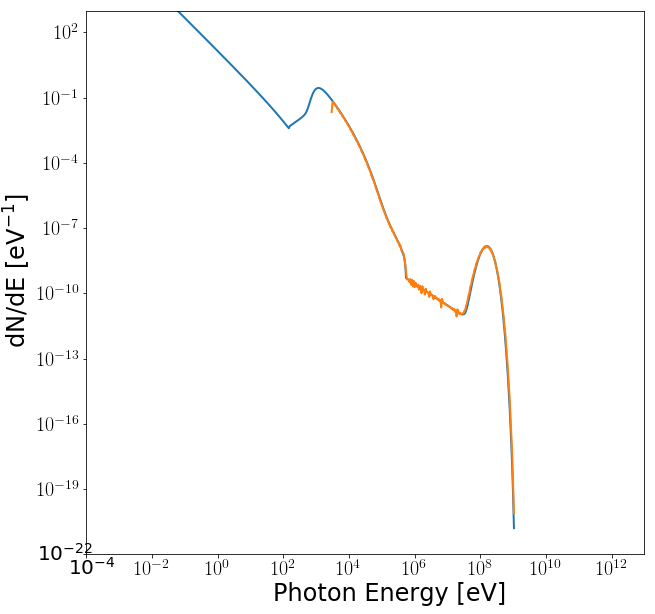

In [11]:
rs_to_plot = 5

# file_spectra.rebin(photon_spectra.eng)

photon_spectra.rebin(file_spectra.eng)


ax = plt.subplot(1,1,1)
plt.rc('text', usetex=True)

# file_spectra.plot(ax, ind=10, indtype='ind', linewidth=2)
# photon_spectra.plot(ax, ind=10, indtype='ind', linewidth=2)

file_spectra.plot(ax, ind=rs_to_plot, indtype='rs', linewidth=2)
photon_spectra.plot(ax, ind=rs_to_plot, indtype='rs', linewidth=2)

ax.set_xscale('log')
ax.set_yscale('log')

plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel('Photon Energy [eV]',fontsize=24)

plt.ylabel('dN/dE [eV$^{-1}$]',fontsize=24)
plt.axis([1e-4, 1e13, 1e-22, 1e3])


In [12]:
print(photon_spectra.rs)
print(file_spectra.rs)

[ 31.          30.69154485  30.38615887  30.08381154  29.78447261
  29.48811216  29.19470054  28.90420842  28.61660674  28.33186674
  28.04995996  27.77085819  27.49453354  27.22095836  26.9501053
  26.68194727  26.41645746  26.15360931  25.89337655  25.63573315
  25.38065335  25.12811163  24.87808274  24.63054168  24.38546369
  24.14282428  23.90259916  23.66476432  23.42929599  23.19617059
  22.96536484  22.73685564  22.51062015  22.28663574  22.06488001
  21.84533078  21.62796611  21.41276425  21.19970369  20.98876311
  20.77992143  20.57315775  20.36845141  20.16578194  19.96512905
  19.7664727   19.56979301  19.37507032  19.18228515  18.99141822
  18.80245045  18.61536294  18.43013699  18.24675406  18.06519582
  17.88544412  17.70748098  17.5312886   17.35684936  17.18414583
  17.01316072  16.84387694  16.67627757  16.51034583  16.34606515
  16.18341908  16.02239137  15.86296591  15.70512676  15.54885814
  15.39414442  15.24097012  15.08931993  14.93917869  14.79053138
  14.643363

/Users/hongwan/GitHub/DarkHistory/darkhistory/spec/spectra.py:442: RuntimeWarning: divide by zero encountered in true_divide
  inv_spectra._grid_vals = 1/other._grid_vals
/Users/hongwan/GitHub/DarkHistory/darkhistory/spec/spectra.py:367: RuntimeWarning: invalid value encountered in multiply
  out_spectra._grid_vals = self._grid_vals * other._grid_vals


[1000.0, 10000000000.0, 0.001, 100000.0]

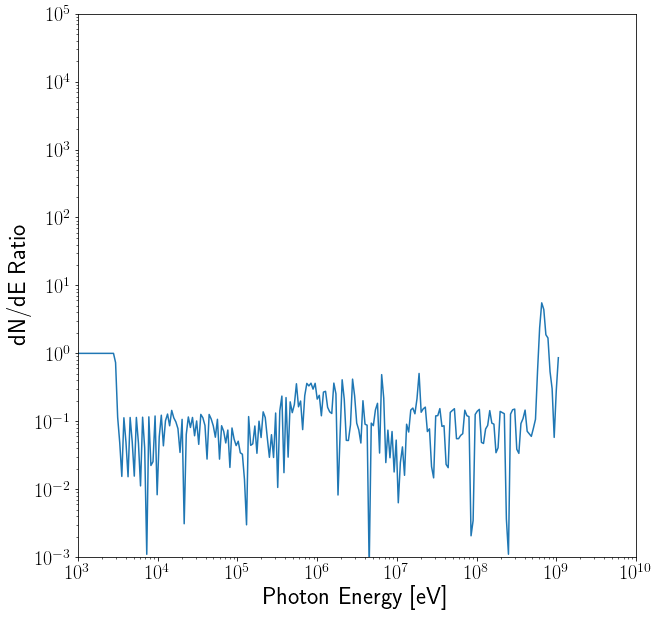

In [13]:
file_spectra = file_spectra.at_rs(photon_spectra.rs, bounds_err=False)

ratio = (photon_spectra-file_spectra)/file_spectra
ax = plt.subplot(1,1,1)
plt.rc('text', usetex=True)

ratio.plot(ax, ind=5, fac=np.sign(ratio[5].dNdE), indtype='ind')
ax.set_xscale('log')
ax.set_yscale('log')

plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel('Photon Energy [eV]',fontsize=24)

plt.ylabel('dN/dE Ratio',fontsize=24)
plt.axis([1e3, 1e10, 1e-3, 1e5])